In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.60336394, -0.5633711 , -0.82909095,  1.15516025,  1.01841472,
        -0.30540336,  0.06191825,  0.20976121,  0.03863525, -0.90845829],
       [ 1.0527693 ,  1.4132746 ,  1.17244856, -1.08926688, -0.87285289,
        -1.02326933,  1.19205711, -0.94812162, -0.35514041,  1.14866155]])

In [4]:
test_Features[:2]

array([[ 0.69263585,  0.38539725,  0.50421072, -0.89835655, -0.74164055,
        -2.26125113,  1.19517091, -0.72637945,  0.25502854,  1.01897704],
       [-0.76822662, -0.76297238, -0.67800741,  0.79631448,  0.49628007,
        -0.29031667, -0.21998262, -0.07920654,  0.82987196,  0.25429571]])

In [5]:
train_Label[:4]

array([0, 0, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*10,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*9,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20*8,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=20*7,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=20*6,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=20*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=20*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Conv1D(filters=20*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [25]:
model.add(MaxPooling1D(pool_size=1))

In [26]:
model.add(Conv1D(filters=20*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [27]:
model.add(MaxPooling1D(pool_size=1))

In [28]:
model.add(Conv1D(filters=20,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [29]:
model.add(MaxPooling1D(pool_size=1))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(10, activation='tanh'))

In [32]:
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 200)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 200)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 180)           36180     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 180)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 160)           28960     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 160)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 140)           22540     
__________

In [34]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [35]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 17s 2ms/step - loss: 0.6110 - acc: 0.6788 - val_loss: 0.4900 - val_acc: 0.7552
Epoch 2/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.4167 - acc: 0.8230 - val_loss: 0.3911 - val_acc: 0.8411
Epoch 3/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.3787 - acc: 0.8451 - val_loss: 0.3807 - val_acc: 0.8431
Epoch 4/30
10194/10194 [==============================] - 16s 2ms/step - loss: 0.3621 - acc: 0.8532 - val_loss: 0.3585 - val_acc: 0.8509
Epoch 5/30
10194/10194 [==============================] - 16s 2ms/step - loss: 0.3529 - acc: 0.8546 - val_loss: 0.3516 - val_acc: 0.8525
Epoch 6/30
10194/10194 [==============================] - 15s 1ms/step - loss: 0.3501 - acc: 0.8552 - val_loss: 0.3533 - val_acc: 0.8525
Epoch 7/30
10194/10194 [==============================] - 15s 1ms/step - loss: 0.3427 - acc: 0.8575 - val_loss: 0.3430 - val_acc:

In [36]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

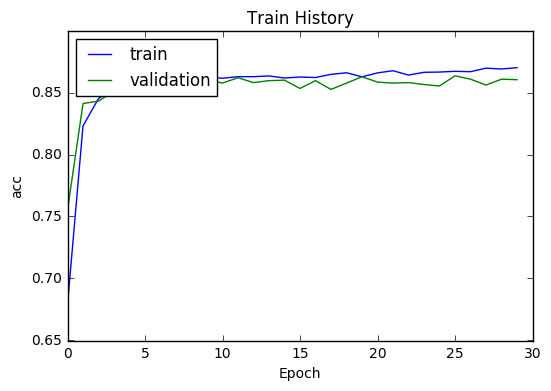

In [37]:
show_train_history(train_history,'acc','val_acc')

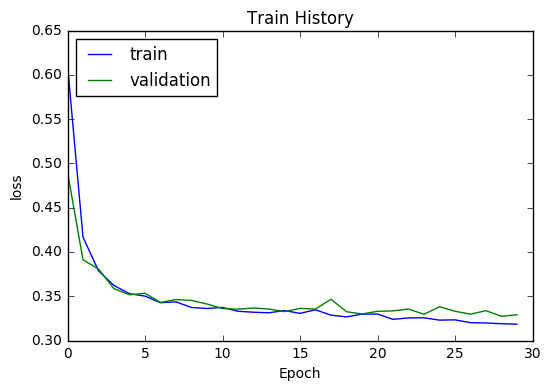

In [38]:
show_train_history(train_history,'loss','val_loss')

In [39]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 155us/step


In [40]:
scores[1]

0.8629918750995699